# Online Food Dataset
Binary Classification problem


Attributes:

__Demographic Information__:

Age: Age of the customer. \
Gender: Gender of the customer. \
Marital Status: Marital status of the customer. \
Occupation: Occupation of the customer. \
Monthly Income: Monthly income of the customer. \
Educational Qualifications: Educational qualifications of the customer. \
Family Size: Number of individuals in the customer's family.


__Location Information__:

Latitude: Latitude of the customer's location. \
Longitude: Longitude of the customer's location. \
Pin Code: Pin code of the customer's location.


__Order Details__:

Output: Current status of the order (e.g., pending, confirmed, delivered). \
Feedback: Feedback provided by the customer after receiving the order. __(Target)__

## Data Routines

### Load Dataset

In [1]:
seed = 8910

In [2]:
import pandas as pd
import numpy as np

In [3]:
dataframe = pd.read_csv('data/onlinefoods.csv')
dataframe.head(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [4]:
# delete extra row
dataframe = dataframe.drop(columns=['Unnamed: 12'])
dataframe.head(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


### Extract features

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Integer features

In [6]:
int_cols: list = dataframe.select_dtypes(int).columns.to_list()
int_cols

['Age', 'Family size', 'Pin code']

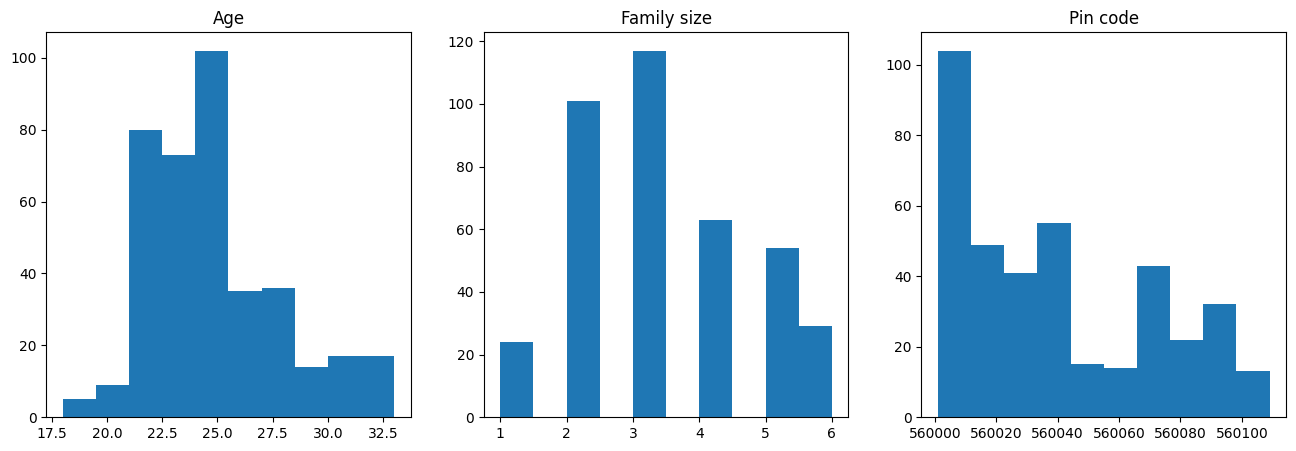

In [7]:
# visualize graphic of features
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

for i in range(3):
    data = dataframe[int_cols[i]].to_numpy(dtype=np.int64)
    axes[i].hist(data)
    axes[i].set_title(int_cols[i])

plt.show()

In [8]:
# all pin code has same three first digits - 560, let delete this digits and make age groups
from sklearn.base import BaseEstimator, TransformerMixin


# make it with pipeline
class IntegerFeaturesTransformer(BaseEstimator, TransformerMixin):
    dataframe: pd.DataFrame | None = None
    
    def fit(self, df: pd.DataFrame, y: None = None) -> BaseEstimator:
        self.dataframe = df
        
        self.dataframe['Pin code'] = pd.Series(self.dataframe['Pin code'] % 1000, dtype=np.float32) 
        
        self.dataframe['Age 18-21'] = pd.Series((18 <= self.dataframe['Age']) & (self.dataframe['Age'] <= 21), dtype=np.float32)
        self.dataframe['Age 22-25'] = pd.Series((22 <= self.dataframe['Age']) & (self.dataframe['Age'] <= 25), dtype=np.float32)
        self.dataframe['Age 26-29'] = pd.Series((26 <= self.dataframe['Age']) & (self.dataframe['Age'] <= 29), dtype=np.float32)
        self.dataframe['Age 30-33'] = pd.Series((30 <= self.dataframe['Age']) & (self.dataframe['Age'] <= 33), dtype=np.float32)
        
        self.dataframe = self.dataframe.drop(columns=['Age'])
        
        return self
    
    def transform(self, X: None = None) -> pd.DataFrame:
        return self.dataframe
    

# test Transformer
trans = IntegerFeaturesTransformer()
trans.fit(dataframe.copy())
trans.transform(dataframe).head(5)

,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Age 18-21,Age 22-25,Age 26-29,Age 30-33
0,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,1.0,Yes,Positive,1.0,0.0,0.0,0.0
1,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,9.0,Yes,Positive,0.0,1.0,0.0,0.0
2,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,17.0,Yes,Negative,0.0,1.0,0.0,0.0
3,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,19.0,Yes,Positive,0.0,1.0,0.0,0.0
4,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,10.0,Yes,Positive,0.0,1.0,0.0,0.0


#### Float features

In [9]:
float_cols: list = dataframe.select_dtypes(float).columns.to_list()
float_cols

['latitude', 'longitude']

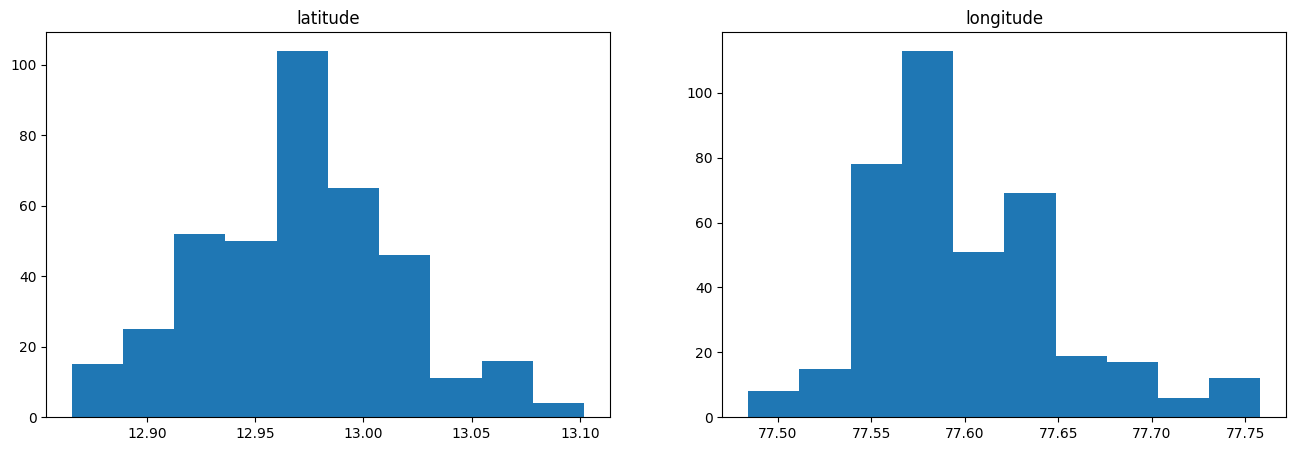

In [10]:
# visualize graphic of features
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

for i in range(2):
    data = dataframe[float_cols[i]].to_numpy(dtype=np.float64)
    axes[i].hist(data)
    axes[i].set_title(float_cols[i])

plt.show()

In [11]:
# all latitude lies on the interval (12.0, 13.1) and the longitude lies on the interval (77.0, 73.0), 
# make it alse with pipeline
class FloatFeaturesTransformer(BaseEstimator, TransformerMixin):
    dataframe: pd.DataFrame | None = None
    
    def fit(self, X: pd.DataFrame, y: None = None) -> BaseEstimator:
        self.dataframe = X
        
        self.dataframe['latitude'] -= 12
        self.dataframe['longitude'] -= 77
        
        return self
    
    def transform(self, X: None = None) -> pd.DataFrame:
        return self.dataframe
    

# test Transformer
trans = FloatFeaturesTransformer()
trans.fit(dataframe.copy())
trans.transform(dataframe).head(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,0.9766,0.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,0.9770,0.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,0.9551,0.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,0.9473,0.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,0.9850,0.5533,560010,Yes,Positive


#### Categorial Features

In [12]:
cat_cols: list = dataframe.select_dtypes(object).columns.to_list()
cat_cols

['Gender',
 'Marital Status',
 'Occupation',
 'Monthly Income',
 'Educational Qualifications',
 'Output',
 'Feedback']

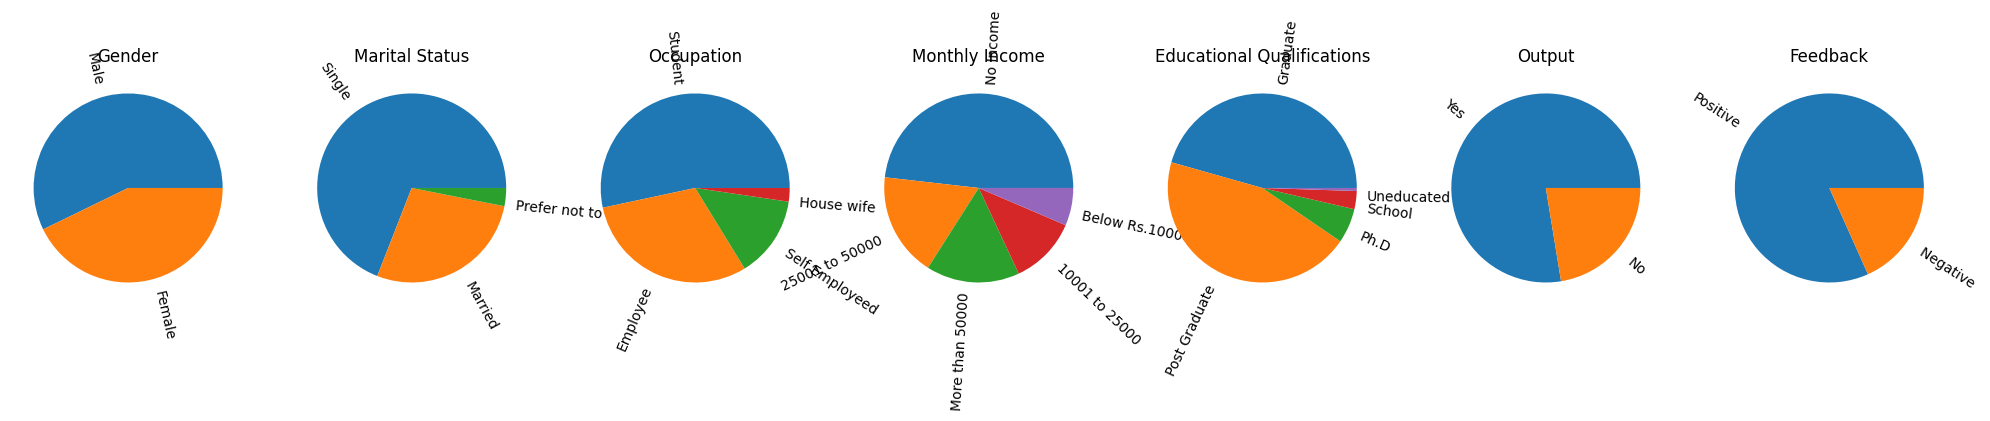

In [13]:
# visualize graphic of features
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(25, 12))

for i in range(7):
    data = dataframe[cat_cols[i]].value_counts().to_dict()
    X = list(data.values())
    labels = list(data.keys())
    axes[i].pie(x=X, labels=labels, rotatelabels=True)
    axes[i].set_title(cat_cols[i])

plt.show()

In [14]:
# delete Feedback col
cat_cols = cat_cols[:-1]
cat_cols

['Gender',
 'Marital Status',
 'Occupation',
 'Monthly Income',
 'Educational Qualifications',
 'Output']

Encode target data to integer

In [15]:
class TargetTransformer(BaseEstimator, TransformerMixin):
    series: pd.Series | None = None
    
    def fit(self, X: pd.Series, y: None = None) -> BaseEstimator:
        self.series = X
        self.series = self.series.replace(['Positive', 'Negative '], [1, 0])
        return self
    
    def transform(self, X: None = None) -> np.ndarray:
        return self.series.to_numpy(dtype=np.float32).reshape(-1, 1)
    
    
# test Transformer
trans = TargetTransformer()
trans.fit(dataframe['Feedback'].copy())
trans.transform(dataframe).shape

/var/folders/1n/ncv2knx92312c9fjnfycb5k80000gn/T/ipykernel_67001/3240235754.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.series = self.series.replace(['Positive', 'Negative '], [1, 0])


(388, 1)

### Transformer pipeline
Make pipeline for data transform \
For categorial data let use OneHot Encoding

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


transformer = ColumnTransformer(
    transformers=(
        ('int_trans', IntegerFeaturesTransformer(), int_cols),
        ('float_trans', FloatFeaturesTransformer(), float_cols),
        ('cat_trans', OneHotEncoder(), cat_cols),
        ('target_trans', TargetTransformer(), 'Feedback')
    )
)

Make full pipeline for data transform

In [17]:
from sklearn.pipeline import Pipeline


class SeparateData(BaseEstimator, TransformerMixin):
    X: np.ndarray
    y: np.ndarray 
    
    def fit(self, data: np.ndarray, y: None = None) -> BaseEstimator:
        self.X = data[:, :-1]
        self.y = data[:, -1]
        return self
    
    def transform(self, X: None = None) -> tuple[np.ndarray,
                                                 np.ndarray]:
        return self.X, self.y
    
    
full_transformer = Pipeline(
    steps=[
        ('transformer', transformer),
        ('separate', SeparateData())
    ]
)
full_transformer.fit(dataframe.copy())

/var/folders/1n/ncv2knx92312c9fjnfycb5k80000gn/T/ipykernel_67001/3240235754.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.series = self.series.replace(['Positive', 'Negative '], [1, 0])


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=(('int_trans',
                                                  IntegerFeaturesTransformer(),
                                                  ['Age', 'Family size',
                                                   'Pin code']),
                                                 ('float_trans',
                                                  FloatFeaturesTransformer(),
                                                  ['latitude', 'longitude']),
                                                 ('cat_trans', OneHotEncoder(),
                                                  ['Gender', 'Marital Status',
                                                   'Occupation',
                                                   'Monthly Income',
                                                   'Educational Qualifications',
                                                   'Output']),
                                                 ('target_trans',
                                                  TargetTransformer(),
                                                  'Feedback')))),
                ('separate', SeparateData())])

Transform data and separate inputs and targets

In [18]:
X, y = full_transformer.transform(dataframe)
X.shape, y.shape

((388, 29), (388,))

### Feature selection with Recursive feature elimination

In [19]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier


selector = RFECV(estimator=DecisionTreeClassifier(random_state=seed), cv=5, n_jobs=-1, scoring='roc_auc', min_features_to_select=10)
selector.fit(X, y)
print(selector.support_, selector.ranking_, sep='\n')
X_selected = selector.transform(X.copy())
X_selected.shape

[ True  True False False False False  True  True False  True False False
 False  True False False False False False  True False False  True False
  True False  True  True False]
[ 1  1  2 15 11  6  1  1  5  1  8 19 17  1  3  4  7 13  9  1 14 12  1 10
  1 16  1  1 18]


(388, 11)

# Model cross validation

In [20]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, make_scorer, RocCurveDisplay


def validate(model: BaseEstimator) -> float:
    scorer = make_scorer(roc_auc_score)
    scores = cross_val_score(model, X=X, y=y, cv=5,
                             n_jobs=-1, scoring=scorer)
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)
    model.fit(X_train, y_train)
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.show()
    return scores.mean()

In [21]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

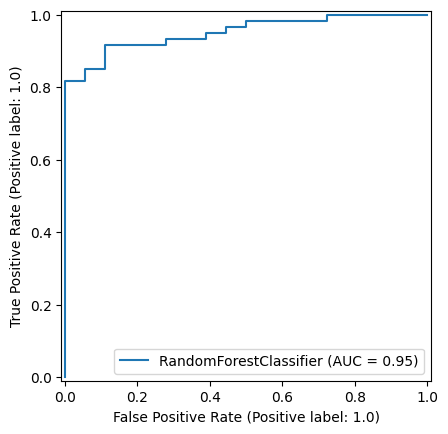

0.7542410714285714

In [22]:
validate(RandomForestClassifier(random_state=seed))

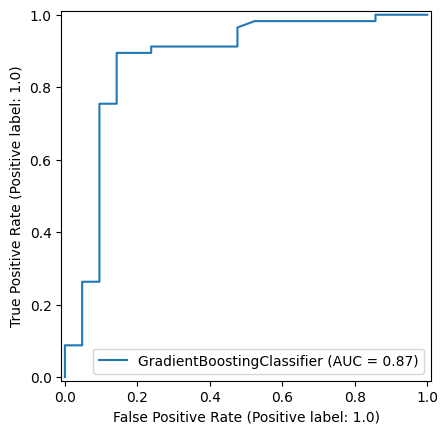

0.7503472222222222

In [23]:
validate(GradientBoostingClassifier(random_state=seed))

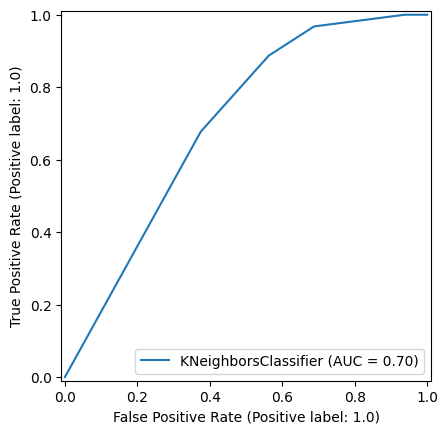

0.5124553571428572

In [24]:
validate(KNeighborsClassifier())

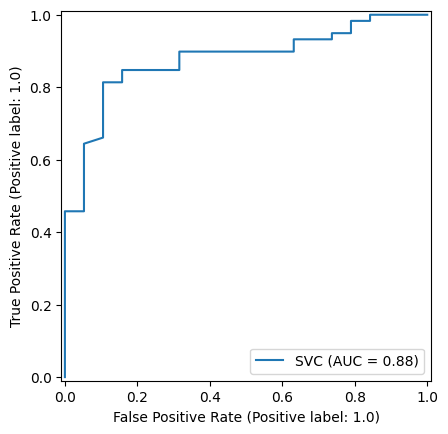

0.5

In [25]:
validate(SVC(random_state=seed))

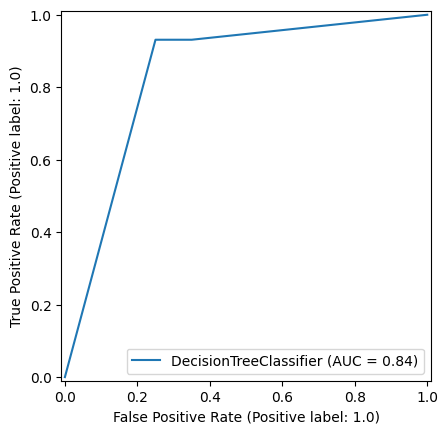

0.7527529761904762

In [26]:
validate(DecisionTreeClassifier(random_state=seed))

Learning rate set to 0.006248
Learning rate set to 0.006248
Learning rate set to 0.006248
Learning rate set to 0.006257
Learning rate set to 0.006257
0:	learn: 0.6855348	total: 56.9ms	remaining: 56.8s
1:	learn: 0.6786136	total: 57.6ms	remaining: 28.7s
2:	learn: 0.6717870	total: 58.2ms	remaining: 19.3s
3:	learn: 0.6651313	total: 58.9ms	remaining: 14.7s
0:	learn: 0.6870358	total: 57.3ms	remaining: 57.3s
4:	learn: 0.6588838	total: 59.5ms	remaining: 11.8s
5:	learn: 0.6521536	total: 59.8ms	remaining: 9.91s
1:	learn: 0.6812635	total: 58.1ms	remaining: 29s
6:	learn: 0.6447411	total: 60.5ms	remaining: 8.58s
2:	learn: 0.6750872	total: 58.7ms	remaining: 19.5s
7:	learn: 0.6388078	total: 61.1ms	remaining: 7.58s
3:	learn: 0.6686131	total: 59.4ms	remaining: 14.8s
8:	learn: 0.6325065	total: 61.8ms	remaining: 6.81s
4:	learn: 0.6627791	total: 60.1ms	remaining: 12s
5:	learn: 0.6573281	total: 60.3ms	remaining: 9.99s
9:	learn: 0.6257840	total: 62.4ms	remaining: 6.18s
6:	learn: 0.6513322	total: 60.9ms	rema

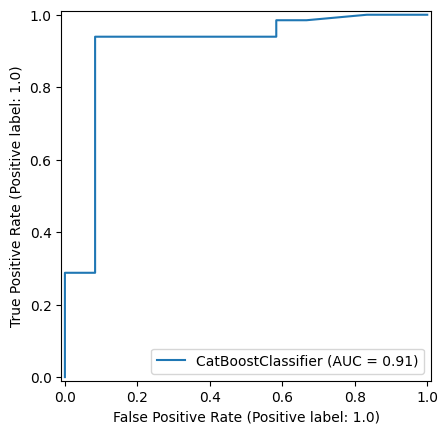

0.7129960317460318

In [27]:
validate(CatBoostClassifier(random_state=seed))

/Users/danila/Documents/Python Projects/Kaggle/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/danila/Documents/Python Projects/Kaggle/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/danila/Documents/Python Projects/Kaggle/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/danila/Documents/Python Projects/Kaggle/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The

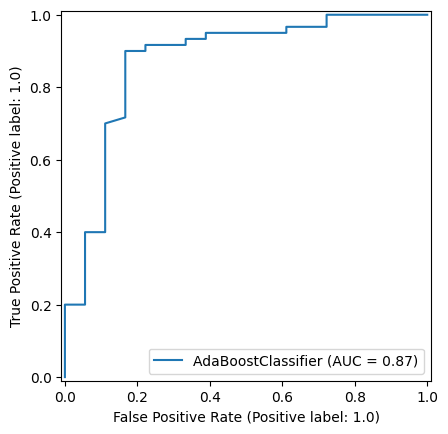

0.7554265873015874

In [28]:
validate(AdaBoostClassifier(random_state=seed))

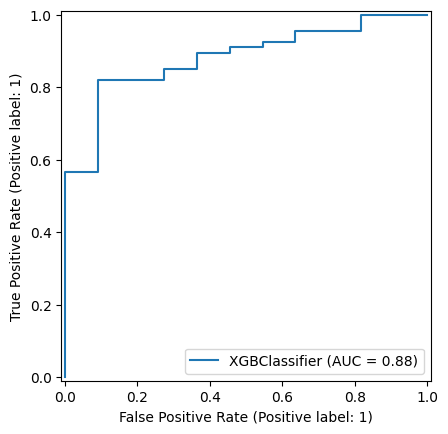

0.7444246031746032

In [29]:
validate(XGBClassifier(random_state=seed))

Select models: CatBoost, RandomForest, XGBoost

# Optimize hyperparamets

In [30]:
from functools import partial


scorer = make_scorer(roc_auc_score)
validate_objective = partial(cross_val_score, X=X_selected, y=y, cv=5, n_jobs=-1, scoring=scorer)

In [31]:
import optuna


def random_forest_objective(trial):
    rf_max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    rf_n_estimators = trial.suggest_int('n_estimators', 10, 510, step=20)
    rf_min_split = trial.suggest_int('min_samples_split', 2, 5)
    clf = RandomForestClassifier(max_depth=rf_max_depth,
                                 n_estimators=rf_n_estimators,
                                 min_samples_split=rf_min_split)
    
    score = validate_objective(clf).mean()
    return score


def cat_objective(trial):
    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        )
    }
    clf = CatBoostClassifier(**param)
    
    score = validate_objective(clf, fit_params={'verbose': False}).mean()
    return score


def xgb_objective(trial):
    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 5e-1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 10, 500, log=True), 
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'eval_metric': roc_auc_score,
        'colsample_bytree': trial.suggest_float('colsample_bytree', 1e-8, 1.0, log=True),
        'colsample_bylevel': trial.suggest_float('colsample_bytree', 1e-8, 1.0, log=True),
        'colsample_bynode': trial.suggest_float('colsample_bytree', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
    }
    regression_obj = XGBClassifier(**params)
    
    score = validate_objective(regression_obj).mean()
    return score


objectives = [
    ('rf', random_forest_objective),
    ('xgb', xgb_objective),
    ('cat', cat_objective),
]

/Users/danila/Documents/Python Projects/Kaggle/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
ga_sampler = optuna.samplers.NSGAIISampler(
    population_size=60,
    mutation_prob=0.14,
    crossover=optuna.samplers.nsgaii.VSBXCrossover()
)


studies: list[optuna.Study] = [None] * len(objectives)
for i, (name, objective) in enumerate(objectives):
    studies[i] = optuna.create_study(study_name=name, direction='maximize', sampler=ga_sampler)
    studies[i].optimize(objective, n_trials=100)

/var/folders/1n/ncv2knx92312c9fjnfycb5k80000gn/T/ipykernel_67001/1095739599.py:4: ExperimentalWarning: VSBXCrossover is experimental (supported from v3.0.0). The interface can change in the future.
  crossover=optuna.samplers.nsgaii.VSBXCrossover()
[I 2024-04-10 21:01:32,285] A new study created in memory with name: rf
[I 2024-04-10 21:01:32,543] Trial 0 finished with value: 0.7198214285714285 and parameters: {'max_depth': 24, 'n_estimators': 350, 'min_samples_split': 3}. Best is trial 0 with value: 0.7198214285714285.
[I 2024-04-10 21:01:32,604] Trial 1 finished with value: 0.7213839285714285 and parameters: {'max_depth': 15, 'n_estimators': 70, 'min_samples_split': 2}. Best is trial 1 with value: 0.7213839285714285.
[I 2024-04-10 21:01:32,677] Trial 2 finished with value: 0.6712003968253968 and parameters: {'max_depth': 4, 'n_estimators': 110, 'min_samples_split': 2}. Best is trial 1 with value: 0.7213839285714285.
[I 2024-04-10 21:01:32,906] Trial 3 finished with value: 0.7336309523

In [33]:
params_dict = {
    'name': [],
    'value': [],
    'params': []
}


for study in studies:
    params_dict['name'].append(study.study_name)
    params_dict['value'].append(study.best_value)
    params_dict['params'].append(study.best_params)
    
pd.DataFrame(params_dict)

,name,value,params
0,rf,0.766672,"{'max_depth': 17, 'n_estimators': 30, 'min_sam..."
1,xgb,0.755159,"{'booster': 'gblinear', 'lambda': 2.7509236803..."
2,cat,0.759797,"{'objective': 'CrossEntropy', 'colsample_bylev..."


In [34]:
params_dict['name'] = [
    'rf', 'xgb', 'cat'
]

params_dict['params'] = [
    {'max_depth': 8, 'n_estimators': 10, 'min_samples_split': 3, 'random_state': seed},
    {'booster': 'gblinear',
     'lambda': 5.839830733086255e-05,
     'alpha': 0.00013427231474669898,
     'learning_rate': 0.06199454231579978,
     'n_estimators': 256,
     'reg_lambda': 2.4088205546091437e-07,
     'reg_alpha': 4.214749370216149e-06,
     'random_state': seed},
    {'objective': 'CrossEntropy',
     'colsample_bylevel': 0.09905242223436718,
     'depth': 7,
     'boosting_type': 'Plain',
     'bootstrap_type': 'Bayesian',
     'random_state': seed}
]

# Voting ensemble

In [35]:
from sklearn.pipeline import Pipeline


def make_estimator(name: str, estimator: BaseEstimator, feature_selector: BaseEstimator) -> Pipeline:
    return Pipeline(
        [
            ('rfe', feature_selector),
            (name, estimator)
        ]
    )
    
    
def make_coefs(estimators: list[tuple[str, BaseEstimator]], X: np.ndarray, y: np.ndarray) -> np.ndarray:
    result = np.empty((len(estimators), len(dataframe)))
    
    for i in range(len(estimators)):
        _, estimator = estimators[i]
        estimator.fit(X, y)
        result[i] = estimator.predict(X)
    
    return result.T

## Calculate weights for voting ensemble

In [36]:
estimators = [
    ('rf', make_estimator('rf', RandomForestClassifier(**params_dict['params'][0]), selector)),
    ('xgb', make_estimator('xgb', XGBClassifier(**params_dict['params'][1]), selector)),
    ('cat', make_estimator('cat', CatBoostClassifier(**params_dict['params'][2]), selector)),
]


ridge_X, ridge_y = make_coefs(estimators, X, y), dataframe['Feedback'].to_numpy()
weights = RidgeClassifier(random_state=seed).fit(ridge_X, ridge_y).coef_[0]
print(weights / weights.sum())

0:	learn: 0.6789607	total: 285us	remaining: 286ms
1:	learn: 0.6483007	total: 889us	remaining: 444ms
2:	learn: 0.6228735	total: 1.13ms	remaining: 376ms
3:	learn: 0.5955396	total: 1.92ms	remaining: 478ms
4:	learn: 0.5734351	total: 2.1ms	remaining: 419ms
5:	learn: 0.5618165	total: 2.49ms	remaining: 413ms
6:	learn: 0.5430341	total: 2.68ms	remaining: 381ms
7:	learn: 0.5260616	total: 2.92ms	remaining: 362ms
8:	learn: 0.5080722	total: 3.11ms	remaining: 343ms
9:	learn: 0.5011527	total: 3.26ms	remaining: 323ms
10:	learn: 0.4954366	total: 3.4ms	remaining: 305ms
11:	learn: 0.4900871	total: 3.52ms	remaining: 290ms
12:	learn: 0.4847724	total: 3.68ms	remaining: 279ms
13:	learn: 0.4800912	total: 3.82ms	remaining: 269ms
14:	learn: 0.4624378	total: 4.63ms	remaining: 304ms
15:	learn: 0.4585431	total: 4.75ms	remaining: 292ms
16:	learn: 0.4548989	total: 4.88ms	remaining: 282ms
17:	learn: 0.4508977	total: 5.02ms	remaining: 274ms
18:	learn: 0.4471644	total: 5.17ms	remaining: 267ms
19:	learn: 0.4435916	total

## Init voting ensemble

In [37]:
from sklearn.ensemble import VotingClassifier


clf = VotingClassifier(estimators=estimators,
                       weights=weights,
                       n_jobs=1,
                       voting='soft')
clf

VotingClassifier(estimators=[('rf',
                              Pipeline(steps=[('rfe',
                                               RFECV(cv=5,
                                                     estimator=DecisionTreeClassifier(random_state=8910),
                                                     min_features_to_select=10,
                                                     n_jobs=-1,
                                                     scoring='roc_auc')),
                                              ('rf',
                                               RandomForestClassifier(max_depth=8,
                                                                      min_samples_split=3,
                                                                      n_estimators=10,
                                                                      random_state=8910))])),
                             ('xgb',
                              Pipeline(steps=[('rfe',
                                               RFECV(cv=5,
                                                     estimator=DecisionTreeClassifier...
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=256,
                                                             n_jobs=None, ...))])),
                             ('cat',
                              Pipeline(steps=[('rfe',
                                               RFECV(cv=5,
                                                     estimator=DecisionTreeClassifier(random_state=8910),
                                                     min_features_to_select=10,
                                                     n_jobs=-1,
                                                     scoring='roc_auc')),
                                              ('cat',
                                               <catboost.core.CatBoostClassifier object at 0x303856890>)]))],
                 n_jobs=1, voting='soft',
                 weights=array([0.78171667, 0.0147844 , 1.02362658]))

## Cross-validation

In [38]:
from sklearn.model_selection import KFold


scores = np.zeros(5)
cv = KFold(5)
for fold, (train, test) in enumerate(cv.split(X, y)):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    
    clf.fit(X_train, y_train)
    
    scores[fold] = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    print(f'Fold: {fold + 1}, ROC-AUC score: {scores[fold]:.5f}')

print(scores, scores.mean())

0:	learn: 0.6813752	total: 202us	remaining: 203ms
1:	learn: 0.6681126	total: 615us	remaining: 307ms
2:	learn: 0.6381708	total: 1.03ms	remaining: 342ms
3:	learn: 0.6120584	total: 1.23ms	remaining: 307ms
4:	learn: 0.6034989	total: 1.42ms	remaining: 282ms
5:	learn: 0.5810599	total: 2ms	remaining: 331ms
6:	learn: 0.5740174	total: 2.13ms	remaining: 302ms
7:	learn: 0.5527436	total: 2.55ms	remaining: 316ms
8:	learn: 0.5330644	total: 2.84ms	remaining: 313ms
9:	learn: 0.5276230	total: 2.99ms	remaining: 296ms
10:	learn: 0.5222850	total: 3.16ms	remaining: 284ms
11:	learn: 0.5176625	total: 3.29ms	remaining: 271ms
12:	learn: 0.5133337	total: 3.41ms	remaining: 259ms
13:	learn: 0.5089764	total: 3.56ms	remaining: 251ms
14:	learn: 0.5051842	total: 3.68ms	remaining: 242ms
15:	learn: 0.5008645	total: 3.82ms	remaining: 235ms
16:	learn: 0.4975527	total: 3.93ms	remaining: 227ms
17:	learn: 0.4903260	total: 4.36ms	remaining: 238ms
18:	learn: 0.4871706	total: 4.5ms	remaining: 233ms
19:	learn: 0.4841546	total: 

## Evalute ensemble

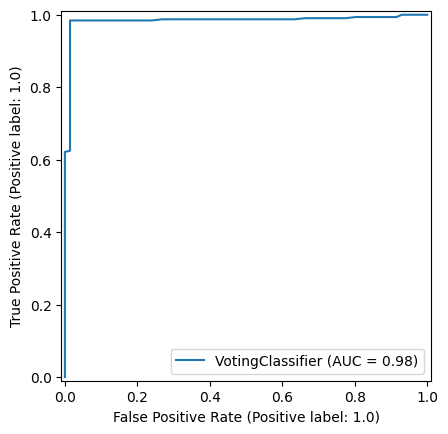

,metric,score
0,accuracy_score,0.981959
1,f1_score,0.988906
2,precision_score,0.993631
3,recall_score,0.984227
4,roc_auc_score,0.978029


In [39]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


metrics = [
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score
]

RocCurveDisplay.from_estimator(clf, X, y)
plt.show()

y_pred = clf.predict(X)
pd.DataFrame({
    'metric': [metric.__name__ for metric in metrics],
    'score': [metric(y, y_pred) for metric in metrics]
})

# Model Pipeline
Make full model pipeline with data transforms

In [40]:
class Model(Pipeline):
    def __init__(self, transformer: BaseEstimator, model: BaseEstimator) -> None:
        super().__init__(steps=[
            ('transformer', transformer),
            ('clf', model)
        ])
        self.transformer = transformer
        self.model = model
        
    def fit(self, data: pd.DataFrame) -> BaseEstimator:
        X, y = self.transformer.fit_transform(data)
        self.model.fit(X, y)
        return self
    
    def predict(self, data: pd.DataFrame) -> np.ndarray:
        X, _ = self.transformer.fit_transform(data)
        result = pd.Series(self.model.predict(X), name='Feedback')
        result = result.replace([0, 1], ['Negative', 'Positive'])
        return result
    
    def predict_proba(self, data: pd.DataFrame) -> np.ndarray:
        X, _ = self.transformer.fit_transform(data)
        return self.model.predict_proba(X)
    

model = Model(full_transformer, clf)
model

Model(model=VotingClassifier(estimators=[('rf',
                                          Pipeline(steps=[('rfe',
                                                           RFECV(cv=5,
                                                                 estimator=DecisionTreeClassifier(random_state=8910),
                                                                 min_features_to_select=10,
                                                                 n_jobs=-1,
                                                                 scoring='roc_auc')),
                                                          ('rf',
                                                           RandomForestClassifier(max_depth=8,
                                                                                  min_samples_split=3,
                                                                                  n_estimators=10,
                                                                                  random_state=8910))])),
                                         ('xgb',
                                          Pipeline(steps=[('rfe',
                                                           RFECV(cv=5,
                                                                 estimator=DecisionTr...
                                   ColumnTransformer(transformers=(('int_trans',
                                                                    IntegerFeaturesTransformer(),
                                                                    ['Age',
                                                                     'Family '
                                                                     'size',
                                                                     'Pin '
                                                                     'code']),
                                                                   ('float_trans',
                                                                    FloatFeaturesTransformer(),
                                                                    ['latitude',
                                                                     'longitude']),
                                                                   ('cat_trans',
                                                                    OneHotEncoder(),
                                                                    ['Gender',
                                                                     'Marital '
                                                                     'Status',
                                                                     'Occupation',
                                                                     'Monthly '
                                                                     'Income',
                                                                     'Educational '
                                                                     'Qualifications',
                                                                     'Output']),
                                                                   ('target_trans',
                                                                    TargetTransformer(),
                                                                    'Feedback')))),
                                  ('separate', SeparateData())]))

Save model predictions to csv file

In [41]:
predicted: pd.Series = model.predict(dataframe)
predicted.to_csv('output/predicted.csv')

/var/folders/1n/ncv2knx92312c9fjnfycb5k80000gn/T/ipykernel_67001/3240235754.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.series = self.series.replace(['Positive', 'Negative '], [1, 0])


Save model HTML representation

In [42]:
from sklearn.utils import estimator_html_repr


with open('output/model.html', 'w') as html_file:
    html_file.write(estimator_html_repr(model))